In [4]:
import numpy as np
from hmmlearn import hmm
from hmmlearn.hmm import MultinomialHMM
import pandas as pd

c:\Users\User\anaconda3\envs\pytorch-env\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [6]:
rewards = pd.read_csv('rewards.txt', header=None).values
rewards = rewards.flatten()  #

print(rewards.shape)

(100,)


In [16]:
n_states = 9
# Number of possible rewards (0, 1, 2)
n_rewards = 3

# Reshape rewards data to fit into the HMM (each observation sequence per state)
X = np.array([rewards]).T 
rewards = X 
print(X.shape)

(100, 1)


In [84]:
model = MultinomialHMM(n_components=n_states, n_iter=5000, tol=1e-4)

# Fit the model to the reward data
model.fit(X)

learned_start_probs = model.startprob_
learned_trans_probs = model.transmat_
learned_emission_probs = model.emissionprob_
# Get the learned transition and emission probabilities for the Multinomial HMM model
print("\nMultinomial HMM Model:")
print("Learned transition probabilities:")
print(model.transmat_)  # Transition matrix

print("\nLearned emission probabilities:")
print(model.emissionprob_)  # Em

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340



Multinomial HMM Model:
Learned transition probabilities:
[[2.56702431e-07 2.10537953e-03 6.07626660e-07 7.55210789e-06
  5.02404249e-02 6.95979866e-01 2.39509318e-03 1.78779126e-02
  2.31392908e-01]
 [1.79548430e-03 1.52838474e-08 3.29676882e-08 2.13171980e-03
  4.17196413e-02 4.01589631e-05 8.26288683e-01 8.07627535e-07
  1.28023457e-01]
 [2.07957036e-05 1.41764634e-18 1.44622447e-04 7.54427455e-01
  9.12770670e-02 5.84618275e-03 2.06469841e-08 1.49522142e-14
  1.48283856e-01]
 [4.45435299e-05 4.70339596e-06 1.55930245e-06 3.15186216e-01
  3.73277057e-01 2.27755406e-05 2.90015227e-07 2.38539454e-01
  7.29234022e-02]
 [2.07654066e-03 4.83438418e-02 6.58441093e-02 3.85771383e-06
  5.95974351e-04 8.76635264e-01 2.06807998e-04 4.78607887e-03
  1.50752511e-03]
 [2.13338017e-05 2.73728777e-11 1.77863784e-15 5.47674088e-02
  8.43516317e-01 1.58786948e-03 9.56543612e-02 1.68491580e-03
  2.76779358e-03]
 [5.05348681e-02 6.69896881e-02 6.20722496e-06 3.79334992e-03
  1.34817281e-10 3.49248750e

In [85]:
# Check the inferred number of features
print("Number of features (n_features):", model.n_features)  # Should be 

print("Emission Probabilities:")
for state_idx, probs in enumerate(model.emissionprob_):
    print(f"State {state_idx}: {probs} (Sum = {np.sum(probs)})")


Number of features (n_features): 1
Emission Probabilities:
State 0: [1.] (Sum = 1.0)
State 1: [1.] (Sum = 1.0)
State 2: [1.] (Sum = 1.0)
State 3: [1.] (Sum = 1.0)
State 4: [1.] (Sum = 1.0)
State 5: [1.] (Sum = 1.0)
State 6: [1.] (Sum = 1.0)
State 7: [1.] (Sum = 1.0)
State 8: [1.] (Sum = 1.0)


In [86]:
# Check overall distribution of rewards
unique, counts = np.unique(rewards, return_counts=True)
print("Reward Distribution:", dict(zip(unique, counts)))

# Get the most likely sequence of states using Viterbi
logprob, predicted_states = model.decode(rewards, algorithm="viterbi")

# Display the predicted states
print("Predicted States:", predicted_states)

# Check reward distribution for each state
for state in range(9):
    state_rewards = rewards[np.where(predicted_states == state)]
    unique, counts = np.unique(state_rewards, return_counts=True)
    print(f"State {state} Reward Distribution:", dict(zip(unique, counts)))


Reward Distribution: {0: 17, 1: 71, 2: 12}
Predicted States: [4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4
 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5]
State 0 Reward Distribution: {}
State 1 Reward Distribution: {}
State 2 Reward Distribution: {}
State 3 Reward Distribution: {}
State 4 Reward Distribution: {0: 17, 1: 33}
State 5 Reward Distribution: {1: 38, 2: 12}
State 6 Reward Distribution: {}
State 7 Reward Distribution: {}
State 8 Reward Distribution: {}


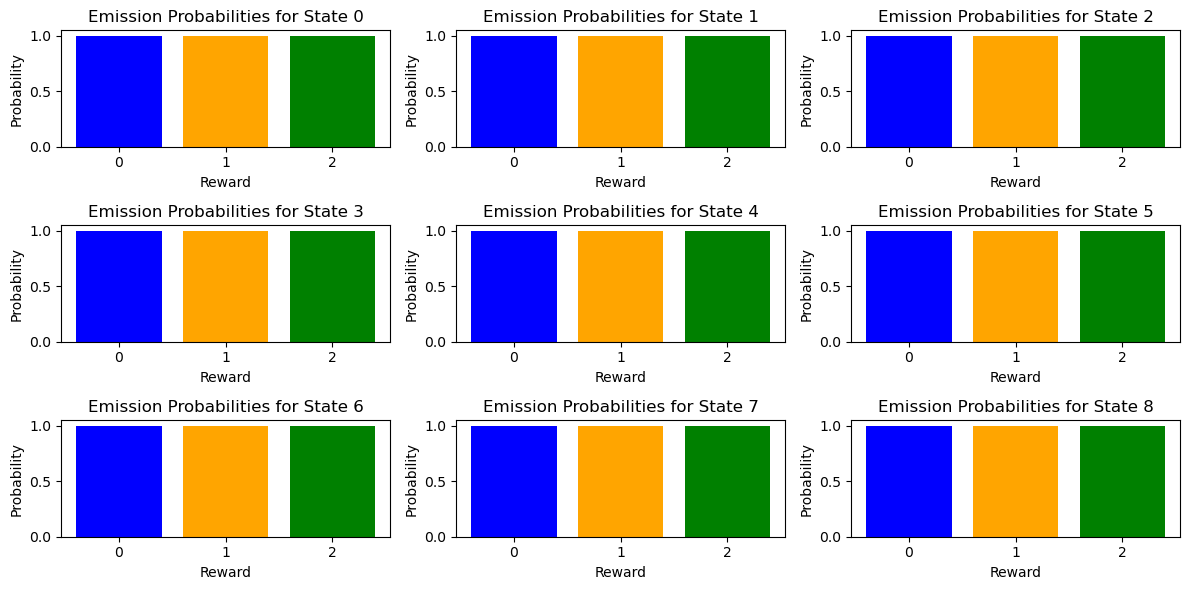

In [69]:
# Plot emission probabilities
plt.figure(figsize=(12, 6))
for i in range(9):  # There are 9 states in the grid
    plt.subplot(3, 3, i + 1)
    plt.bar(range(3), learned_emission_probs[i], color=['blue', 'orange', 'green'])
    plt.title(f'Emission Probabilities for State {i}')
    plt.xlabel('Reward')
    plt.ylabel('Probability')
    plt.xticks(range(3), ['0', '1', '2'])
    plt.tight_layout()
plt.show()

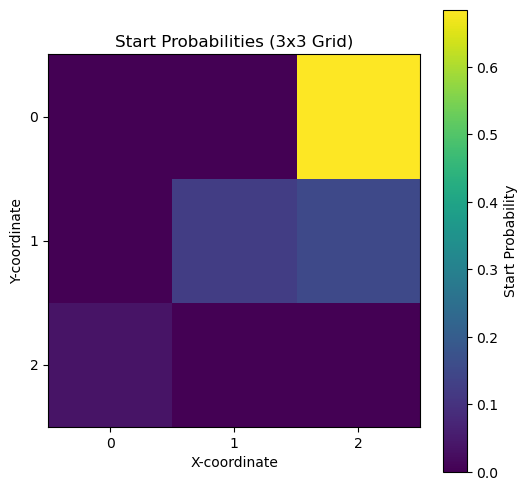

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape the start probabilities to a 3x3 grid
start_probs_grid = learned_start_probs.reshape((3, 3))

# Plot the heatmap
plt.figure(figsize=(6, 6))
plt.imshow(start_probs_grid, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Start Probability')
plt.title('Start Probabilities (3x3 Grid)')
plt.xticks(range(3), ['0', '1', '2'])
plt.yticks(range(3), ['0', '1', '2'])
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.show()


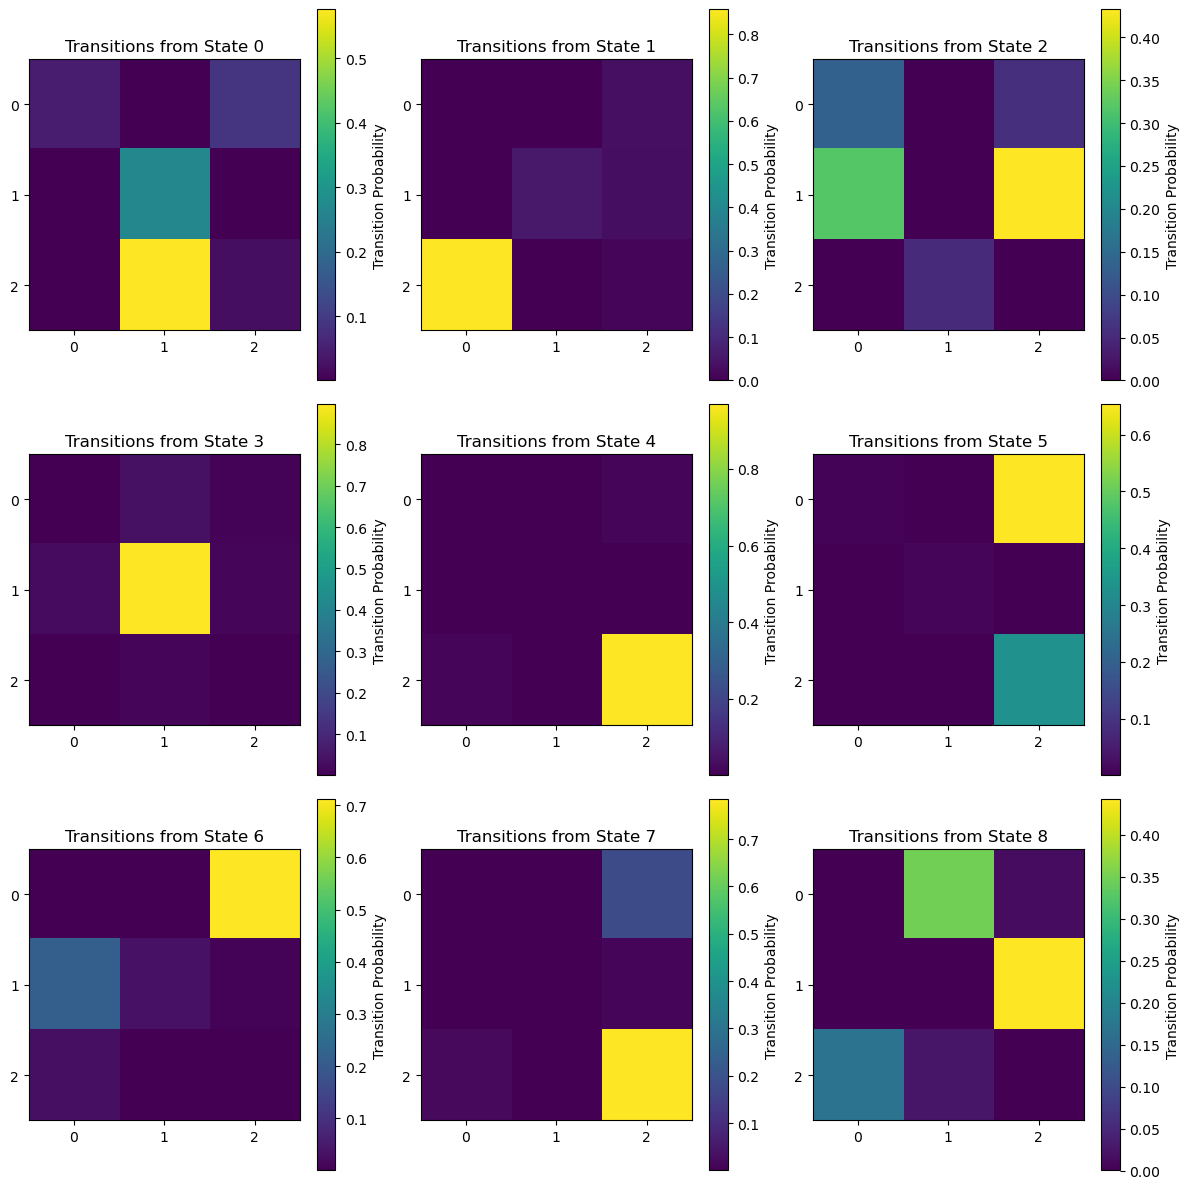

In [25]:
plt.figure(figsize=(12, 12))
for i in range(9):  # There are 9 states in the grid
    plt.subplot(3, 3, i + 1)
    plt.imshow(learned_trans_probs[i].reshape((3, 3)), cmap='viridis', interpolation='nearest')
    plt.title(f'Transitions from State {i}')
    plt.colorbar(label='Transition Probability')
    plt.xticks(range(3), ['0', '1', '2'])
    plt.yticks(range(3), ['0', '1', '2'])
    plt.tight_layout()
plt.show()